In [21]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
df_train = pd.read_csv("../train.csv")
df_test =  pd.read_csv("../test.csv")

#preverving houses ID
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)


#We find out there is missing data, therefore lets combine there dataframe
#to big one and do data clearning

ntrain = df_train.shape[0]
ntest = df_test.shape[0]

y_train = df_train.SalePrice.values

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)

all_data.drop(['SalePrice'], axis=1, inplace=True) #drop SalePrice

all_data.shape #Checking dataframe size

#Identify features with missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})


#Impute based on description.txt
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["GarageQual"] = all_data["GarageQual"].fillna("None")
all_data["GarageCond"] = all_data["GarageCond"].fillna("None")
all_data["GarageFinish"] = all_data["GarageFinish"].fillna("None")
all_data["GarageType"] = all_data["GarageType"].fillna("None")
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna("None")
all_data["BsmtCond"] = all_data["BsmtCond"].fillna("None")
all_data["BsmtQual"] = all_data["BsmtQual"].fillna("None")
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna("None")
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna("None")
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["Functional"] = all_data["Functional"].fillna("Typ")


#ASSUMPTION ************
#LotFrontage -> fill in missing values by the median LotFrontage of the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#************


#ASSUMPTION ************
#GarageYrBlt, GarageArea, GarageCars
#For these categorical garage-related NA means that there is no garage
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(0)
all_data["GarageArea"] = all_data["GarageArea"].fillna(0)
all_data["GarageCars"] = all_data["GarageCars"].fillna(0)


#BsmtFullBath, BsmtHalfBath, BsmtUnfSF, TotalBsmtSF, BsmtFinSF1, BsmtFinSF2
#For these categorical basement-related NA means that there is no basement
all_data["BsmtFullBath"] = all_data["BsmtFullBath"].fillna(0)
all_data["BsmtHalfBath"] = all_data["BsmtHalfBath"].fillna(0)
all_data["BsmtUnfSF"] = all_data["BsmtUnfSF"].fillna(0)
all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna(0)
all_data["BsmtFinSF2"] = all_data["BsmtFinSF2"].fillna(0)
all_data["BsmtFinSF1"] = all_data["BsmtFinSF1"].fillna(0)

#MasVnrArea NA means no masonry veneer for these houses, therefore We can fill 0
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#************

#MSSubClass -> NA means No building class. We can replace missing values with None
all_data["MSSubClass"] = all_data["MSSubClass"].fillna("None")

#************

#ASSUMPTION *************

#MSZoning -> There is only 4 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#Utilities -> There is only 2 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

#Electrical -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
#KitchenQual -> data description says NA means "None".
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Exterior1st -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

#Exterior2nd -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#SaleType -> There is only 1 NA value, lets compute this with most comon value
# of the entire dataframe.
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
#************

/Users/babu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [23]:
#train_df.info()
print('-'*50)
#test_df.info()

--------------------------------------------------


##### What is the distribution of numerical feature values across the samples?

In [24]:
#pd.set_option('display.max_columns', None)
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Id does not contrinbute to the sale price of the house : DROPPED

##### What is the distribution of categorical features?

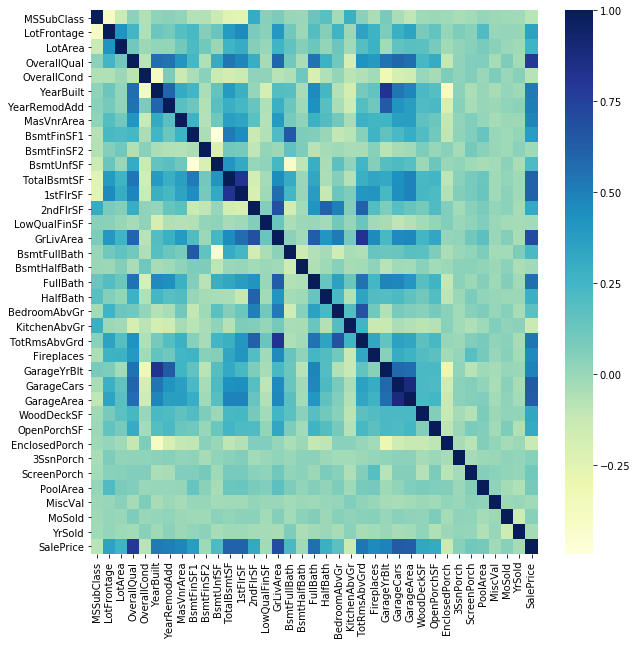

In [25]:
# study correlation of categorical features with sales price
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (10,10))
#sns.heatmap(corrmat, ax=ax, linewidths = 0.1)
sns.heatmap(corrmat, cmap="YlGnBu")

In [42]:
pd.set_option('display.max_columns', None)
df_correlated = df_train.corr()

#df_correlated[df_correlated['SalePrice'] > 0.5].sort_values(by='SalePrice', ascending=False)
ser = (df_correlated.loc['SalePrice']).sort_values(ascending=False).head(15)
ser.drop('SalePrice')

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

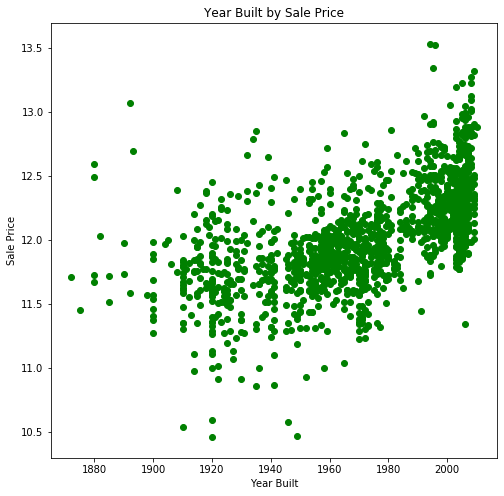

In [27]:
#yr = train_df[(train_df['YearBuilt'] > 2000) & (train_df['YearBuilt'] < 2010)]
plt.figure(figsize=(8, 8))
plt.scatter(df_train['YearBuilt'], np.log(df_train[['SalePrice']]), color='green')
plt.title('Year Built by Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

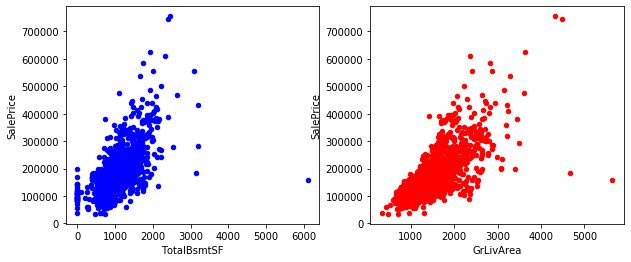

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
df_train.plot(ax=axes[0], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='b')
df_train.plot(ax=axes[1], kind='scatter', x='GrLivArea', y='SalePrice',c='r')
plt.show()

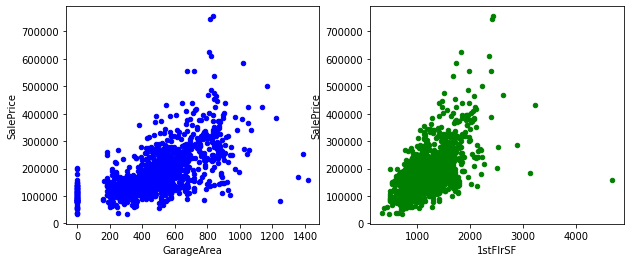

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
df_train.plot(ax=axes[0], kind='scatter', x='GarageArea', y='SalePrice',c='b')
df_train.plot(ax=axes[1], kind='scatter', x='1stFlrSF', y='SalePrice',c='g')
plt.show()

Text(0, 0.5, 'Sale Price')

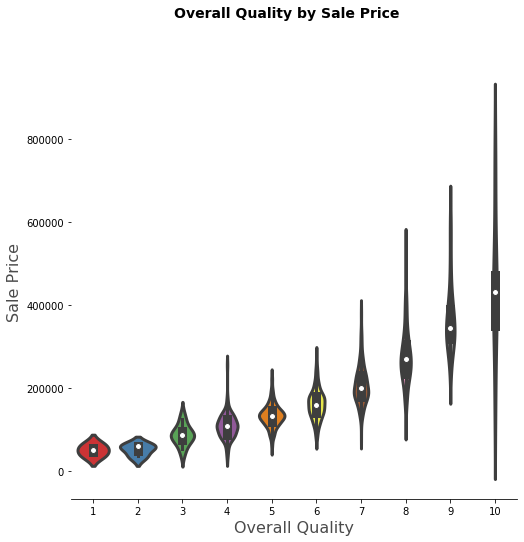

In [30]:
# Show each distribution with both violins and points
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="OverallQual",y="SalePrice",data=df_train, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Overall Quality by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("Overall Quality",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

Text(0, 0.5, 'Sale Price')

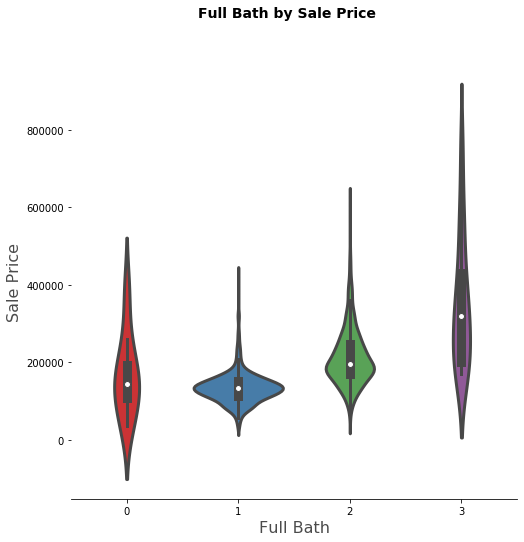

In [31]:
# Show each distribution with both violins and points
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="FullBath",y="SalePrice",data=df_train, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Full Bath by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("Full Bath",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

Text(0, 0.5, 'Sale Price')

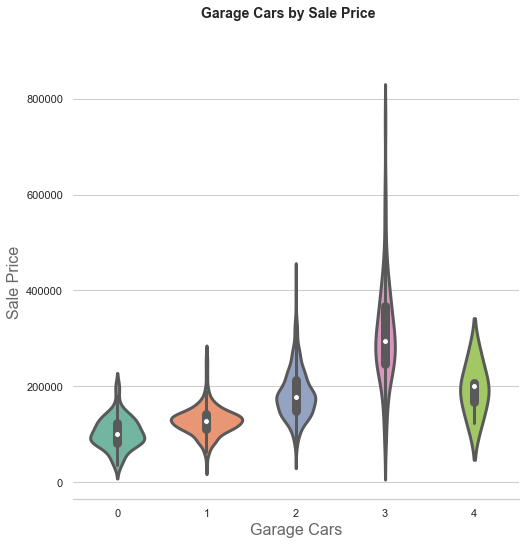

In [32]:
# Show each distribution with both violins and points
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="GarageCars",y="SalePrice",data=df_train, inner="box", palette="Set2", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Garage Cars by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("Garage Cars",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

Text(0, 0.5, 'Sale Price')

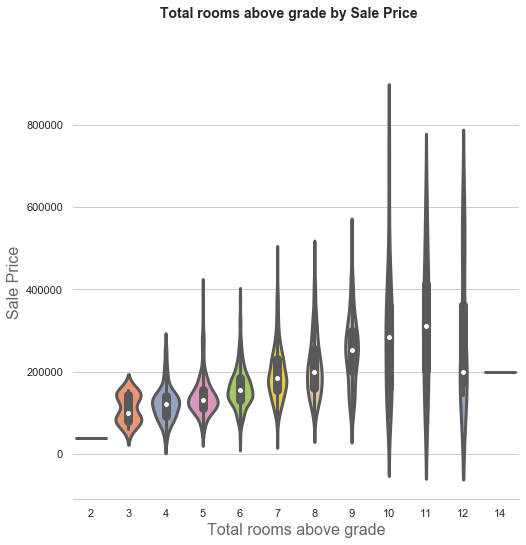

In [33]:
# Show each distribution with both violins and points
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(x="TotRmsAbvGrd",y="SalePrice",data=df_train, inner="box", palette="Set2", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Total rooms above grade by Sale Price', fontsize=14, fontweight='bold')
ax.set_xlabel("Total rooms above grade",size = 16,alpha=0.7)
ax.set_ylabel("Sale Price",size = 16,alpha=0.7)

In [34]:
#from sklearn import linear_model
#ols = linear_model.LinearRegression()
#ols.fit(X_train, Y_train)  
#print("beta's" + str(np.round(ols.coef_, 3)))
#print("beta_0: " + str(np.round(ols.intercept_, 3)))
#print("RSS: %.2f" % np.sum((ols.predict(X_train) - Y_train) ** 2))
#print("R^2: %.5f" % ols.score(X_train, Y_train))

In [35]:
#res = ols.predict(X_test)
#pd.DataFrame(res, columns=['SalePrice'])